In [14]:
import pandas as pd
import numpy as np

nyc_vc_df = pd.read_csv('/content/drive/MyDrive/Sparkrockets/cleaned_nyc.csv')
openvc_df = pd.read_csv('/content/drive/MyDrive/Sparkrockets/cleaned_openvc.csv')
austrian_vc_df = pd.read_csv('/content/drive/MyDrive/Sparkrockets/cleaned_austrian.csv')


In [15]:
# data cleaning & Processing

nyc_vc_df.rename(columns={'Fund Name': 'Name', 'Description': 'Description / Eligibility'}, inplace=True)
openvc_df.rename(columns={'Investor name': 'Name', 'Investment thesis': 'Description / Eligibility', 'Global HQ': 'Location'}, inplace=True)

combined_vc_df = pd.concat([nyc_vc_df, openvc_df, austrian_vc_df], ignore_index=True)
combined_vc_df.fillna('Unknown', inplace=True)
combined_vc_df.drop_duplicates(inplace=True)

columns_to_drop = ['Best Contact', 'Website Domain', 'Currently *Most* Excited About','Website','First cheque minimum','First cheque maximum']

cleaned_vc_df = combined_vc_df.drop(columns=columns_to_drop)
cleaned_vc_df.to_csv('/content/drive/MyDrive/cleaned_vc_data.csv', index=False)

print(cleaned_vc_df.head())

                      Name                 Stage      Location  \
0                25madison         Pre-seed,Seed  New York, NY   
1             645 Ventures  Seed,Seed+,Late Seed  New York, NY   
2  Acronym Venture Capital             Late Seed  New York, NY   
3         Advancit Capital  Seed,Seed+,Late Seed  New York, NY   
4      AlphaPrime Ventures            Seed,Seed+  New York, NY   

                                          Focus Area     Lead  \
0  Consumer,FinTech,SaaS,Food Tech,Real Estate,Ma...  checked   
1             SaaS,Enterprise,B2B Tech,Internet Tech  checked   
2  Enterprise,PropTech,Hospitality Tech,FinTech,W...  Unknown   
3                                Consumer,Media Tech  checked   
4              Enterprise,General Tech,Internet Tech  Unknown   

                           Description / Eligibility  \
0                                            Unknown   
1  645 Ventures is an early-stage venture capital...   
2  We fund Late Seed and Series A companies 

<ipython-input-15-dfdbd557221f>:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  combined_vc_df.fillna('Unknown', inplace=True)


In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

#Vectorization

vectorizer = CountVectorizer()

ideas_df = pd.read_csv('/content/drive/MyDrive/Sparkrockets/ideas.csv')
vc_df = pd.read_csv('/content/drive/MyDrive/cleaned_vc_data.csv')

ideas_df['idea_description'] = ideas_df['idea_description'].fillna('').astype(str)
vc_df['Focus Area'] = vc_df['Focus Area'].fillna('').astype(str)

#  Vectorize the 'idea_description' and 'Focus Area' fields
idea_vectors = vectorizer.fit_transform(ideas_df['idea_description'])
vc_vectors = vectorizer.transform(vc_df['Focus Area'])

vectorizer = CountVectorizer(stop_words='english')

# Vectorize the 'idea_description' and 'Focus Area' fields
idea_vectors = vectorizer.fit_transform(ideas_df['idea_description'])
vc_vectors = vectorizer.transform(vc_df['Focus Area'])

# Calculate Cosine Similarity between ideas and VCs
similarity_matrix = cosine_similarity(idea_vectors, vc_vectors)

best_matches = similarity_matrix.argmax(axis=1)

# Add the best-matching VCs to the ideas DataFrame & Display the results (top 5 rows)
ideas_df['Best Matching VC'] = vc_df.iloc[best_matches]['Name'].values
print(ideas_df[['idea_description', 'Best Matching VC']].head(10))

# Optionally, save the results to a new CSV file
ideas_df.to_csv('/content/drive/MyDrive/ideas_matched_with_vcs.csv', index=False)




                                    idea_description Best Matching VC
0  An organizer system that you install in handba...        25madison
1  A business that does balloon animals for corpo...        25madison
2                                                           25madison
3  I'm building a global innovation platform that...   Bowery Capital
4  sharikat tasnae eilajat lilkilab khaliatan min...        25madison
5  A company that makes an app to stop food waste...     Corner Table
6  a business for tourists that uses a QR code to...        25madison
7  A lemonade stand outside event venues to sell ...        25madison
8  A mems small satellite propulsion system for m...        25madison
9  BlockLenses are UV blocking daily-wear contact...        25madison


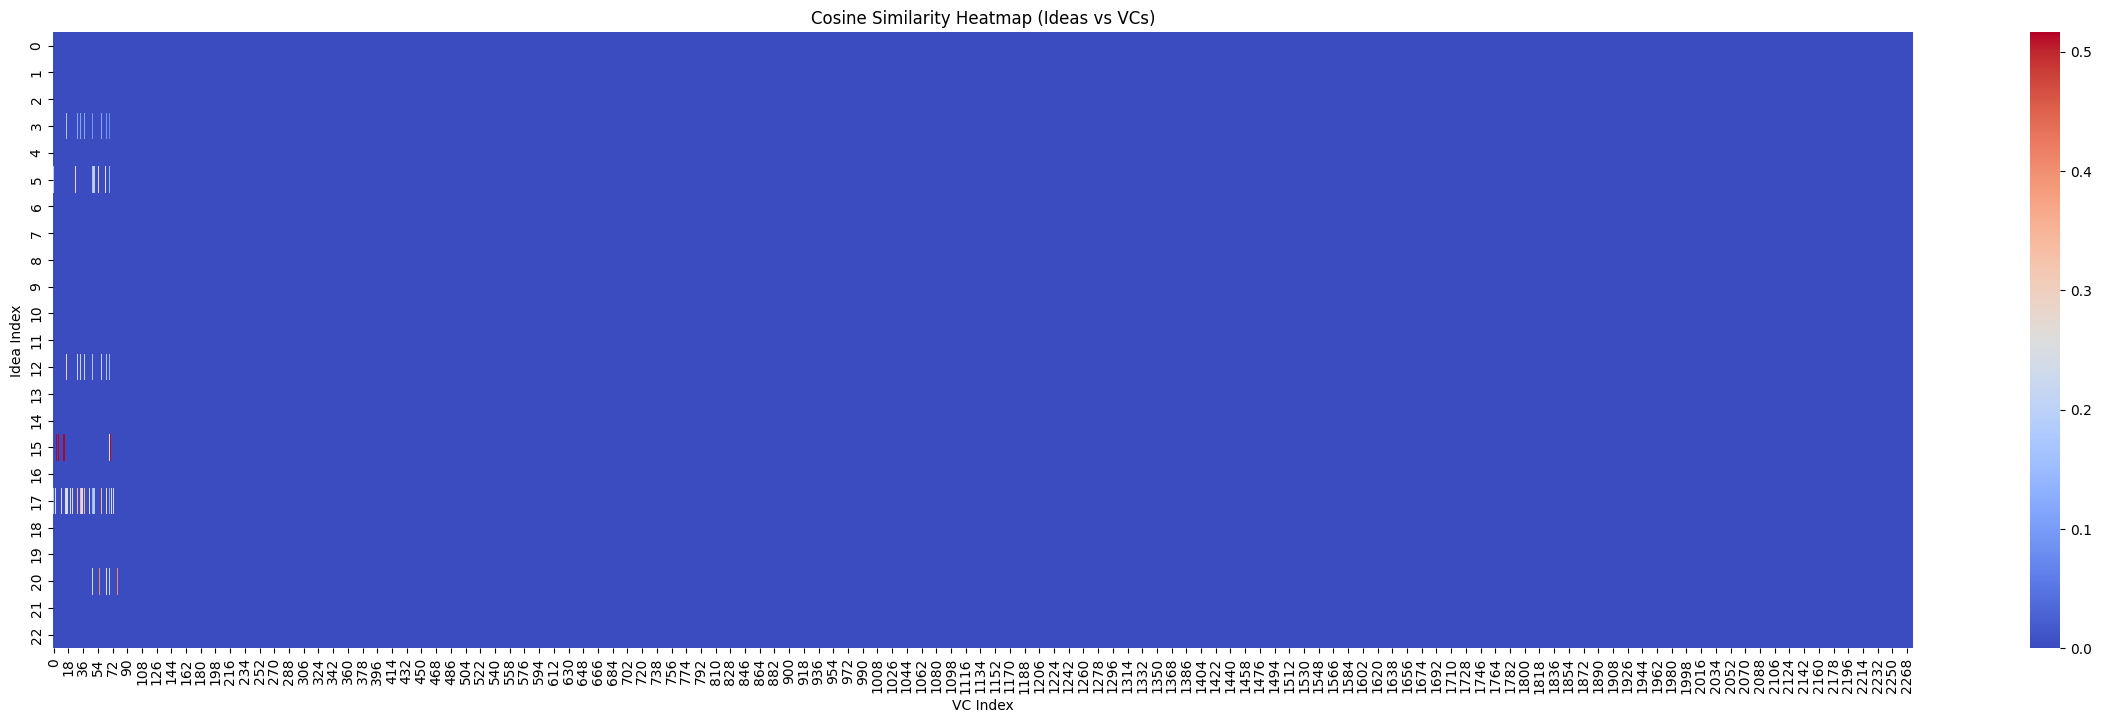

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

#  similarity_matrix is the cosine similarity matrix between ideas and VCs
plt.figure(figsize=(30, 8))
sns.heatmap(similarity_matrix, cmap='coolwarm', annot=False)
plt.title("Cosine Similarity Heatmap (Ideas vs VCs)")
plt.xlabel("VC Index")
plt.ylabel("Idea Index")
plt.show()

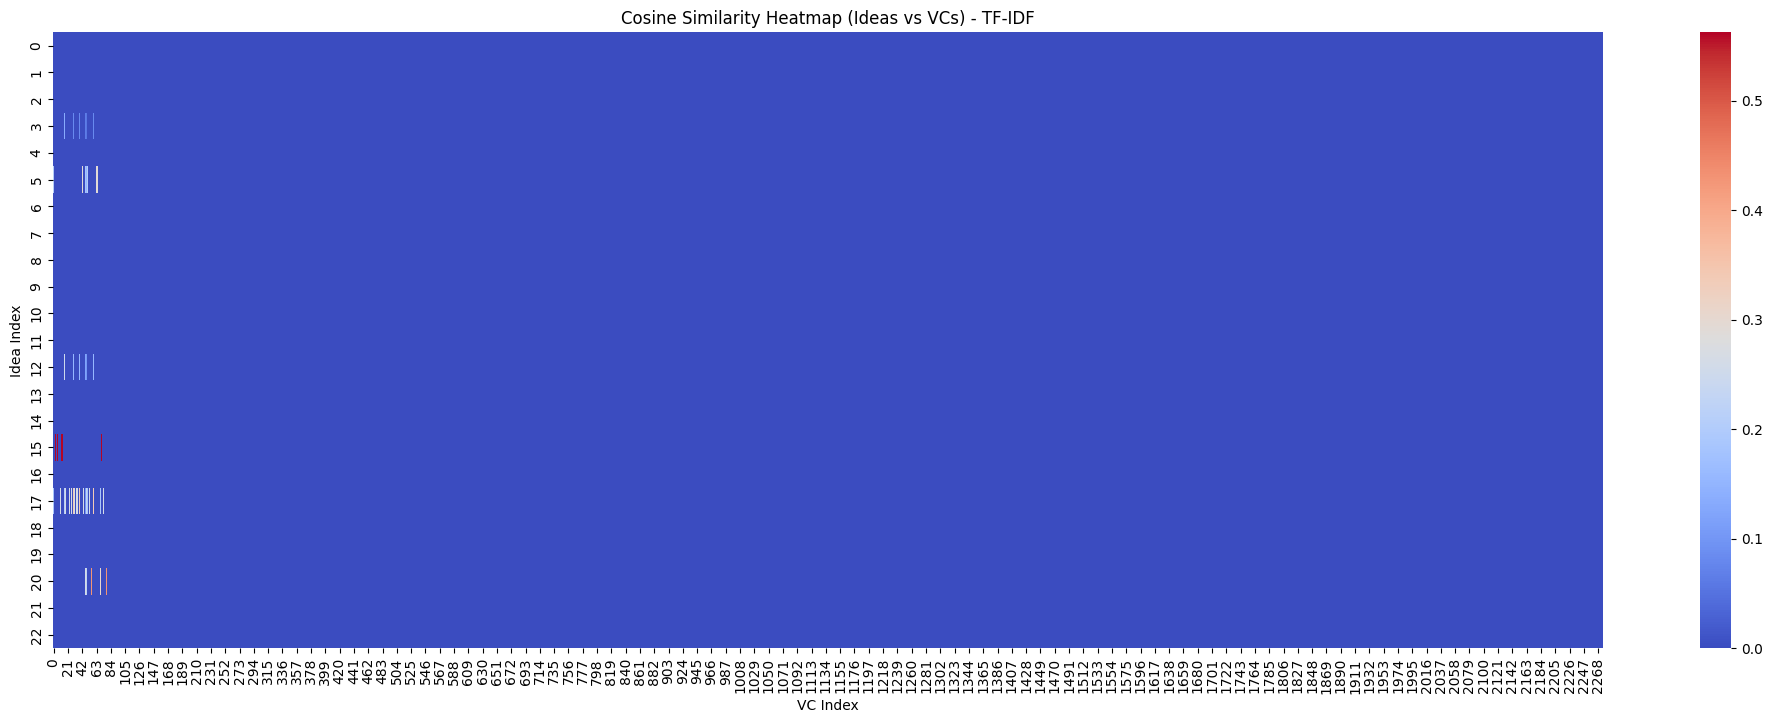

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

tfidf_vectorizer = TfidfVectorizer(stop_words='english')

ideas_df['idea_description'] = ideas_df['idea_description'].fillna('').astype(str)
vc_df['Focus Area'] = vc_df['Focus Area'].fillna('').astype(str)

idea_vectors_tfidf = tfidf_vectorizer.fit_transform(ideas_df['idea_description'])
vc_vectors_tfidf = tfidf_vectorizer.transform(vc_df['Focus Area'])

#Calculate Cosine Similarity between ideas and VCs
similarity_matrix_tfidf = cosine_similarity(idea_vectors_tfidf, vc_vectors_tfidf)

# Evaluate model Plot the Cosine Similarity Heatmap
plt.figure(figsize=(25, 8))
sns.heatmap(similarity_matrix_tfidf, cmap='coolwarm', annot=False)
plt.title("Cosine Similarity Heatmap (Ideas vs VCs) - TF-IDF")
plt.xlabel("VC Index")
plt.ylabel("Idea Index")
plt.show()

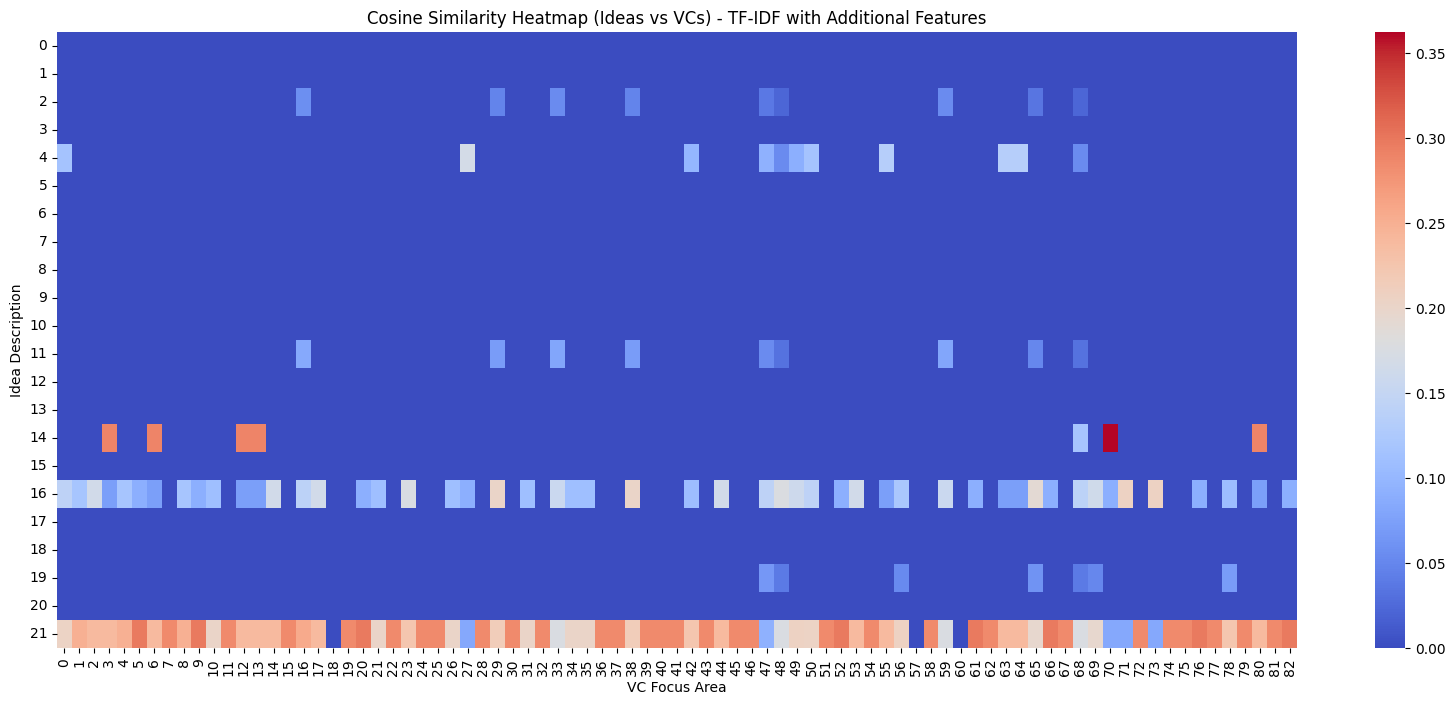

In [26]:
# new approach. Adjust the colums that we are going to use (Clean & combine)
vc_df['Focus Area'] = vc_df['Focus Area'].fillna('').astype(str)
vc_df['Location'] = vc_df['Location'].fillna('').astype(str)
vc_df['Countries of investment'] = vc_df['Countries of investment'].fillna('').astype(str)

ideas_df['idea_description'] = ideas_df['idea_description'].fillna('').astype(str)
ideas_df['Location'] = ideas_df['user_last_ip_country_name'].fillna('').astype(str)
ideas_df['canvas_customer_segments'] = ideas_df['canvas_customer_segments'].fillna('').astype(str)

vc_df['combined_features'] = vc_df['Focus Area'] + ' ' + vc_df['Location'] + ' ' + vc_df['Countries of investment']
ideas_df['combined_features'] = ideas_df['idea_description'] + ' ' + ideas_df['Location'] + ' ' + ideas_df['canvas_customer_segments']

# this part is crucial, when I didn't remove the empty cells, empty cells matched with one another.

vc_df = vc_df[vc_df['Focus Area'].str.strip() != 'Unknown']  # Remove 'Unknown' VCs
vc_df = vc_df[vc_df['Focus Area'].str.strip() != '']         # Remove empty VC focus areas

ideas_df = ideas_df[ideas_df['idea_description'].str.strip() != '']  # Remove ideas with empty descriptions

# TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
idea_vectors_tfidf = tfidf_vectorizer.fit_transform(ideas_df['combined_features'])
vc_vectors_tfidf = tfidf_vectorizer.transform(vc_df['combined_features'])

# Cosine-Similarity
similarity_matrix_tfidf = cosine_similarity(idea_vectors_tfidf, vc_vectors_tfidf)

# heatmap for new model
plt.figure(figsize=(20, 8))
sns.heatmap(similarity_matrix_tfidf, cmap='coolwarm', annot=False)
plt.title("Cosine Similarity Heatmap (Ideas vs VCs) - TF-IDF with Additional Features")
plt.xlabel("VC Focus Area")
plt.ylabel("Idea Description")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [32]:
# I need further help to translate what these numerical values are telling me.
mean_similarity = np.mean(similarity_matrix_tfidf)
max_similarity = np.max(similarity_matrix_tfidf)
min_similarity = np.min(similarity_matrix_tfidf)
std_similarity = np.std(similarity_matrix_tfidf)

print(f"Mean Similarity: {mean_similarity:.4f}")
print(f"Max Similarity: {max_similarity:.4f}")
print(f"Min Similarity: {min_similarity:.4f}")
print(f"Standard Deviation of Similarity: {std_similarity:.4f}")

Mean Similarity: 0.0165
Max Similarity: 0.3623
Min Similarity: 0.0000
Standard Deviation of Similarity: 0.0579


In [38]:

# Find the top N matches with highest similarity scores,
N = 10
top_matches = np.unravel_index(np.argsort(similarity_matrix_tfidf, axis=None)[-N:], similarity_matrix_tfidf.shape)

# Display the top N matches
for i, j in zip(top_matches[0], top_matches[1]):
    print(f"with similarity score: {similarity_matrix_tfidf[i, j]:.4f}")

with similarity score: 0.2898
with similarity score: 0.2975
with similarity score: 0.2975
with similarity score: 0.2975
with similarity score: 0.2975
with similarity score: 0.2975
with similarity score: 0.2975
with similarity score: 0.2975
with similarity score: 0.2975
with similarity score: 0.3623
